In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Friday 23 - 02 - 2018

**Data information**

In [2]:
fri = pd.read_csv('/kaggle/input/cic-ids-2018/Friday-23-02-2018_TrafficForML_CICFlowMeter.csv')
fri.head() #first 5 rows

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,6,23/02/2018 08:18:29,1532698,11,11,1179,1969,648,0,...,32,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign
1,500,17,23/02/2018 08:17:45,117573855,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58786927.5,2.375324e+07,75583006,41990849,Benign
2,500,17,23/02/2018 08:17:45,117573848,3,0,1500,0,500,500,...,8,0.0,0.0,0,0,58786924.0,2.375325e+07,75583007,41990841,Benign
3,22,6,23/02/2018 08:19:55,1745392,11,11,1179,1969,648,0,...,32,0.0,0.0,0,0,0.0,0.000000e+00,0,0,Benign
4,500,17,23/02/2018 08:18:17,89483474,6,0,3000,0,500,500,...,8,4000364.0,0.0,4000364,4000364,21370777.5,1.528092e+07,41989576,7200485,Benign


In [3]:
fri.shape #number of rows and columns

(1048575, 80)

In [4]:
print ('Number of rows (Samples): ' , fri.shape[0])
print ('Number of columns (Features): ' , fri.shape[1])

Number of rows (Samples):  1048575
Number of columns (Features):  80


In [5]:
print(fri['Label'].value_counts())

Benign              1048009
Brute Force -Web        362
Brute Force -XSS        151
SQL Injection            53
Name: Label, dtype: int64


In [6]:
fri.info() #columns and their datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 80 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1048575 non-null  int64  
 1   Protocol           1048575 non-null  int64  
 2   Timestamp          1048575 non-null  object 
 3   Flow Duration      1048575 non-null  int64  
 4   Tot Fwd Pkts       1048575 non-null  int64  
 5   Tot Bwd Pkts       1048575 non-null  int64  
 6   TotLen Fwd Pkts    1048575 non-null  int64  
 7   TotLen Bwd Pkts    1048575 non-null  int64  
 8   Fwd Pkt Len Max    1048575 non-null  int64  
 9   Fwd Pkt Len Min    1048575 non-null  int64  
 10  Fwd Pkt Len Mean   1048575 non-null  float64
 11  Fwd Pkt Len Std    1048575 non-null  float64
 12  Bwd Pkt Len Max    1048575 non-null  int64  
 13  Bwd Pkt Len Min    1048575 non-null  int64  
 14  Bwd Pkt Len Mean   1048575 non-null  float64
 15  Bwd Pkt Len Std    1048575 non-n

In [7]:
columns_to_exclude = ['Dst Port', 'Label', 'Timestamp']
filtered_columns = [column for column in fri.columns if column not in columns_to_exclude]
negative_rows = fri[fri['Init Fwd Win Byts'] < 0][filtered_columns]
print(negative_rows['Init Fwd Win Byts'])

1         -1
2         -1
4         -1
5         -1
6         -1
          ..
1048561   -1
1048562   -1
1048567   -1
1048568   -1
1048572   -1
Name: Init Fwd Win Byts, Length: 308468, dtype: int64


In [8]:
fri.describe() #basic statistical computations

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Act Data Pkts,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,...,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,9.348696e+03,8.975475e+00,1.872781e+07,6.973433e+00,9.927304e+00,4.139611e+02,9.754156e+03,1.829207e+02,1.238202e+01,4.556939e+01,...,2.223984e+00,1.640559e+01,7.418233e+04,3.906540e+04,1.352481e+05,5.029775e+04,9.651403e+06,1.361818e+05,9.767623e+06,9.513826e+06
std,1.843987e+04,5.043780e+00,3.633651e+07,1.208786e+02,3.130818e+02,2.152351e+03,4.400548e+05,2.760979e+02,2.864373e+01,5.596788e+01,...,4.366489e+00,5.843276e+00,8.559987e+05,5.136679e+05,1.279458e+06,7.272785e+05,2.499512e+07,1.589312e+06,2.511830e+07,2.495002e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,6.000000e+00,5.120000e+02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,4.430000e+02,6.000000e+00,9.511800e+04,2.000000e+00,1.000000e+00,4.500000e+01,1.010000e+02,4.100000e+01,0.000000e+00,3.600000e+01,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.389000e+03,1.700000e+01,5.284498e+06,8.000000e+00,7.000000e+00,4.550000e+02,6.995000e+02,1.960000e+02,3.100000e+01,5.685197e+01,...,4.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553400e+04,1.700000e+01,1.200000e+08,5.809100e+04,1.231180e+05,1.582330e+06,1.563604e+08,6.592000e+03,1.449000e+03,1.809552e+03,...,1.088000e+03,4.800000e+01,1.131706e+08,6.950474e+07,1.131706e+08,1.131706e+08,1.199916e+08,7.157844e+07,1.199916e+08,1.199916e+08


In [9]:
df = fri.corr()
correlation_flow_bytes = df['Flow Byts/s']
print(correlation_flow_bytes.to_string())

/tmp/ipykernel_32/1786732120.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = fri.corr()


Dst Port             0.074486
Protocol            -0.014037
Flow Duration       -0.035722
Tot Fwd Pkts        -0.000723
Tot Bwd Pkts         0.001037
TotLen Fwd Pkts     -0.001926
TotLen Bwd Pkts      0.001571
Fwd Pkt Len Max     -0.025716
Fwd Pkt Len Min      0.015270
Fwd Pkt Len Mean     0.002500
Fwd Pkt Len Std     -0.017005
Bwd Pkt Len Max     -0.038451
Bwd Pkt Len Min     -0.010405
Bwd Pkt Len Mean    -0.029527
Bwd Pkt Len Std     -0.034260
Flow Byts/s          1.000000
Flow Pkts/s          0.554259
Flow IAT Mean       -0.025864
Flow IAT Std        -0.019092
Flow IAT Max        -0.031546
Flow IAT Min        -0.024572
Fwd IAT Tot         -0.035052
Fwd IAT Mean        -0.026683
Fwd IAT Std         -0.018261
Fwd IAT Max         -0.030936
Fwd IAT Min         -0.024747
Bwd IAT Tot         -0.021457
Bwd IAT Mean        -0.017323
Bwd IAT Std         -0.018939
Bwd IAT Max         -0.018078
Bwd IAT Min         -0.004495
Fwd PSH Flags        0.214800
Bwd PSH Flags             NaN
Fwd URG Fl

**Removing Null Values**

* Observed that only Flow Byt/s has null values
* The cells in that row also have Infinity values and Flow Duration as Infinity

> If there is a missing value in only one row then it is advised to impute or change
> If there are a large number of missing values in a row then we can drop it

* one thing i noticed is all the values of the rows which have the null values have the same values in every other column for every row, so seems more like duplicates which need to be dropped
* i noticed that only sql injection needs FlowByt/s , so maybe it is not that important of a column to replace so we should just drop?

* reasons for dropping
    1. 0.35 % is NaN - insignificant
    2. all cols have value as 0 in the rows
    3. Flow Byts/s has very low correlation with the rest of the columns
    4. Benign Label
    5. worst case - increases FP
* reasons for replacing
    1. Flow duration is 0 for all NaN and Inf values

In [10]:
#null values
fri_null_values = fri.isnull().sum()
print(fri_null_values.to_string())

Dst Port                0
Protocol                0
Timestamp               0
Flow Duration           0
Tot Fwd Pkts            0
Tot Bwd Pkts            0
TotLen Fwd Pkts         0
TotLen Bwd Pkts         0
Fwd Pkt Len Max         0
Fwd Pkt Len Min         0
Fwd Pkt Len Mean        0
Fwd Pkt Len Std         0
Bwd Pkt Len Max         0
Bwd Pkt Len Min         0
Bwd Pkt Len Mean        0
Bwd Pkt Len Std         0
Flow Byts/s          3754
Flow Pkts/s             0
Flow IAT Mean           0
Flow IAT Std            0
Flow IAT Max            0
Flow IAT Min            0
Fwd IAT Tot             0
Fwd IAT Mean            0
Fwd IAT Std             0
Fwd IAT Max             0
Fwd IAT Min             0
Bwd IAT Tot             0
Bwd IAT Mean            0
Bwd IAT Std             0
Bwd IAT Max             0
Bwd IAT Min             0
Fwd PSH Flags           0
Bwd PSH Flags           0
Fwd URG Flags           0
Bwd URG Flags           0
Fwd Header Len          0
Bwd Header Len          0
Fwd Pkts/s  

In [11]:
#nan values
fri_nan_values = fri.isna().sum()
print(fri_nan_values.to_string())

Dst Port                0
Protocol                0
Timestamp               0
Flow Duration           0
Tot Fwd Pkts            0
Tot Bwd Pkts            0
TotLen Fwd Pkts         0
TotLen Bwd Pkts         0
Fwd Pkt Len Max         0
Fwd Pkt Len Min         0
Fwd Pkt Len Mean        0
Fwd Pkt Len Std         0
Bwd Pkt Len Max         0
Bwd Pkt Len Min         0
Bwd Pkt Len Mean        0
Bwd Pkt Len Std         0
Flow Byts/s          3754
Flow Pkts/s             0
Flow IAT Mean           0
Flow IAT Std            0
Flow IAT Max            0
Flow IAT Min            0
Fwd IAT Tot             0
Fwd IAT Mean            0
Fwd IAT Std             0
Fwd IAT Max             0
Fwd IAT Min             0
Bwd IAT Tot             0
Bwd IAT Mean            0
Bwd IAT Std             0
Bwd IAT Max             0
Bwd IAT Min             0
Fwd PSH Flags           0
Bwd PSH Flags           0
Fwd URG Flags           0
Bwd URG Flags           0
Fwd Header Len          0
Bwd Header Len          0
Fwd Pkts/s  

In [12]:
fri.loc[fri['Flow Byts/s'].isna()]

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2969,49490,6,23/02/2018 08:18:33,0,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3265,49582,6,23/02/2018 08:31:57,0,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3269,49584,6,23/02/2018 08:31:58,0,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3275,49590,6,23/02/2018 08:31:59,0,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3305,49596,6,23/02/2018 08:32:03,0,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043825,50632,6,23/02/2018 11:53:30,0,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1044734,52042,6,23/02/2018 03:34:08,0,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1045798,52102,6,23/02/2018 03:43:01,0,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1046392,49491,6,23/02/2018 08:17:04,0,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [13]:
#drop null values
fri.dropna(axis=0,inplace=True)
print(fri)

         Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0              22         6  23/02/2018 08:18:29        1532698            11   
1             500        17  23/02/2018 08:17:45      117573855             3   
2             500        17  23/02/2018 08:17:45      117573848             3   
3              22         6  23/02/2018 08:19:55        1745392            11   
4             500        17  23/02/2018 08:18:17       89483474             6   
...           ...       ...                  ...            ...           ...   
1048570     54116         6  23/02/2018 09:00:54       85992425             2   
1048571     33914         6  23/02/2018 12:31:42            132             2   
1048572        53        17  23/02/2018 12:15:24          79134             1   
1048573      3389         6  23/02/2018 12:45:39       10053785            11   
1048574       445         6  23/02/2018 09:04:11         566835             6   

         Tot Bwd Pkts  TotL

In [14]:
#null values after
fri_null_values = fri.isnull().sum()
print(fri_null_values.to_string())

Dst Port             0
Protocol             0
Timestamp            0
Flow Duration        0
Tot Fwd Pkts         0
Tot Bwd Pkts         0
TotLen Fwd Pkts      0
TotLen Bwd Pkts      0
Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Flow Byts/s          0
Flow Pkts/s          0
Flow IAT Mean        0
Flow IAT Std         0
Flow IAT Max         0
Flow IAT Min         0
Fwd IAT Tot          0
Fwd IAT Mean         0
Fwd IAT Std          0
Fwd IAT Max          0
Fwd IAT Min          0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Fwd PSH Flags        0
Bwd PSH Flags        0
Fwd URG Flags        0
Bwd URG Flags        0
Fwd Header Len       0
Bwd Header Len       0
Fwd Pkts/s           0
Bwd Pkts/s           0
Pkt Len Min          0
Pkt Len Max          0
Pkt Len Mean         0
Pkt Len Std

In [15]:
#nan values after
fri_null_values = fri.isna().sum()
print(fri_null_values.to_string())

Dst Port             0
Protocol             0
Timestamp            0
Flow Duration        0
Tot Fwd Pkts         0
Tot Bwd Pkts         0
TotLen Fwd Pkts      0
TotLen Bwd Pkts      0
Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Flow Byts/s          0
Flow Pkts/s          0
Flow IAT Mean        0
Flow IAT Std         0
Flow IAT Max         0
Flow IAT Min         0
Fwd IAT Tot          0
Fwd IAT Mean         0
Fwd IAT Std          0
Fwd IAT Max          0
Fwd IAT Min          0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Fwd PSH Flags        0
Bwd PSH Flags        0
Fwd URG Flags        0
Bwd URG Flags        0
Fwd Header Len       0
Bwd Header Len       0
Fwd Pkts/s           0
Bwd Pkts/s           0
Pkt Len Min          0
Pkt Len Max          0
Pkt Len Mean         0
Pkt Len Std

In [16]:
fri.loc[fri['Flow Byts/s'].isna()]

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


**Infinite values**

* only Flow Byt/s and Flow Pkt/s have infinite values
* we will have to remove all the rows which contain infinite values as, i noticed that every row which has the infinity value also has the exact same values across the row thereby becoming duplicate

In [17]:
ds = fri.isin([np.inf, -np.inf])
print("Infinite values before:" ,ds)

Infinite values before:          Dst Port  Protocol  Timestamp  Flow Duration  Tot Fwd Pkts  \
0           False     False      False          False         False   
1           False     False      False          False         False   
2           False     False      False          False         False   
3           False     False      False          False         False   
4           False     False      False          False         False   
...           ...       ...        ...            ...           ...   
1048570     False     False      False          False         False   
1048571     False     False      False          False         False   
1048572     False     False      False          False         False   
1048573     False     False      False          False         False   
1048574     False     False      False          False         False   

         Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0               False            False         

In [18]:
fri_data = fri.iloc[:, 3:79]
fri_inf_count = np.isinf(fri_data.iloc[1:]).sum().sum()
print("Count of Infinite Values before:", fri_inf_count)

Count of Infinite Values before: 3908


In [19]:
fri_inf_values = np.isinf(fri_data.iloc[1:]).sum()
print("Infinite values count before:", fri_inf_values.to_string())

Infinite values count before: Flow Duration           0
Tot Fwd Pkts            0
Tot Bwd Pkts            0
TotLen Fwd Pkts         0
TotLen Bwd Pkts         0
Fwd Pkt Len Max         0
Fwd Pkt Len Min         0
Fwd Pkt Len Mean        0
Fwd Pkt Len Std         0
Bwd Pkt Len Max         0
Bwd Pkt Len Min         0
Bwd Pkt Len Mean        0
Bwd Pkt Len Std         0
Flow Byts/s          1954
Flow Pkts/s          1954
Flow IAT Mean           0
Flow IAT Std            0
Flow IAT Max            0
Flow IAT Min            0
Fwd IAT Tot             0
Fwd IAT Mean            0
Fwd IAT Std             0
Fwd IAT Max             0
Fwd IAT Min             0
Bwd IAT Tot             0
Bwd IAT Mean            0
Bwd IAT Std             0
Bwd IAT Max             0
Bwd IAT Min             0
Fwd PSH Flags           0
Bwd PSH Flags           0
Fwd URG Flags           0
Bwd URG Flags           0
Fwd Header Len          0
Bwd Header Len          0
Fwd Pkts/s              0
Bwd Pkts/s              0
Pkt Len 

In [20]:
#to remove infinity values 
fri = fri.replace(["Infinity", "infinity"], np.inf)
fri = fri.replace([np.inf, -np.inf], np.nan)
fri.replace([np.inf, -np.inf], np.nan, inplace=True)
fri.dropna(inplace=True)

In [21]:
ds = fri.isin([np.inf, -np.inf])
print("Infinite values after:" ,ds)

Infinite values after:          Dst Port  Protocol  Timestamp  Flow Duration  Tot Fwd Pkts  \
0           False     False      False          False         False   
1           False     False      False          False         False   
2           False     False      False          False         False   
3           False     False      False          False         False   
4           False     False      False          False         False   
...           ...       ...        ...            ...           ...   
1048570     False     False      False          False         False   
1048571     False     False      False          False         False   
1048572     False     False      False          False         False   
1048573     False     False      False          False         False   
1048574     False     False      False          False         False   

         Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0               False            False          

In [22]:
fri_data = fri.iloc[:, 3:79]
fri_inf_count = np.isinf(fri_data.iloc[1:]).sum().sum()
print("Count of Infinite Values after:", fri_inf_count)

Count of Infinite Values after: 0


In [23]:
fri_inf_values = np.isinf(fri_data.iloc[1:]).sum()
print("Infinite values count after:", fri_inf_values.to_string())

Infinite values count after: Flow Duration        0
Tot Fwd Pkts         0
Tot Bwd Pkts         0
TotLen Fwd Pkts      0
TotLen Bwd Pkts      0
Fwd Pkt Len Max      0
Fwd Pkt Len Min      0
Fwd Pkt Len Mean     0
Fwd Pkt Len Std      0
Bwd Pkt Len Max      0
Bwd Pkt Len Min      0
Bwd Pkt Len Mean     0
Bwd Pkt Len Std      0
Flow Byts/s          0
Flow Pkts/s          0
Flow IAT Mean        0
Flow IAT Std         0
Flow IAT Max         0
Flow IAT Min         0
Fwd IAT Tot          0
Fwd IAT Mean         0
Fwd IAT Std          0
Fwd IAT Max          0
Fwd IAT Min          0
Bwd IAT Tot          0
Bwd IAT Mean         0
Bwd IAT Std          0
Bwd IAT Max          0
Bwd IAT Min          0
Fwd PSH Flags        0
Bwd PSH Flags        0
Fwd URG Flags        0
Bwd URG Flags        0
Fwd Header Len       0
Bwd Header Len       0
Fwd Pkts/s           0
Bwd Pkts/s           0
Pkt Len Min          0
Pkt Len Max          0
Pkt Len Mean         0
Pkt Len Std          0
Pkt Len Var          0
FIN F

**Duplicate Values**

we do have to remove all the duplicates

In [24]:
print("Duplicate values before:")
fri.duplicated()

Duplicate values before:


0          False
1          False
2          False
3          False
4          False
           ...  
1048570    False
1048571    False
1048572    False
1048573    False
1048574    False
Length: 1042867, dtype: bool

In [25]:
print("Count of duplicate values before:")
fri.duplicated().sum()

Count of duplicate values before:


2608

In [26]:
print("Duplicate values before (all occurences):")
fri.loc[fri.duplicated(keep=False), :]

Duplicate values before (all occurences):


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2183,445,6,23/02/2018 09:20:47,20,1,1,0,0,0,0,...,40,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2510,445,6,23/02/2018 02:59:28,20,1,1,0,0,0,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2582,445,6,23/02/2018 02:59:28,20,1,1,0,0,0,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2701,445,6,23/02/2018 09:20:47,20,1,1,0,0,0,0,...,40,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3193,80,6,23/02/2018 08:30:37,83,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036933,137,17,23/02/2018 11:39:25,62,1,1,50,211,50,50,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1039053,137,17,23/02/2018 11:39:27,62,1,1,50,211,50,50,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1041781,137,17,23/02/2018 11:39:24,63,1,1,50,211,50,50,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1043902,137,17,23/02/2018 11:39:25,87,1,1,50,211,50,50,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [27]:
print("Duplicate values before (first occurences):")
fri.loc[fri.duplicated(keep='first'), :] #keeping only the first occurence of the duplicate

Duplicate values before (first occurences):


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
2582,445,6,23/02/2018 02:59:28,20,1,1,0,0,0,0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2701,445,6,23/02/2018 09:20:47,20,1,1,0,0,0,0,...,40,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3996,80,6,23/02/2018 09:25:30,74,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4267,80,6,23/02/2018 09:45:35,67,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
5786,80,6,23/02/2018 10:30:39,262,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034963,443,6,23/02/2018 04:48:45,134,2,0,0,0,0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1036933,137,17,23/02/2018 11:39:25,62,1,1,50,211,50,50,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1039053,137,17,23/02/2018 11:39:27,62,1,1,50,211,50,50,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1043902,137,17,23/02/2018 11:39:25,87,1,1,50,211,50,50,...,8,0.0,0.0,0,0,0.0,0.0,0,0,Benign


In [28]:
# Use keep='first' to keep the first occurrence 
fri.drop_duplicates(keep='first',inplace = True)

In [29]:
print("Duplicate values after:")
fri.duplicated()

Duplicate values after:


0          False
1          False
2          False
3          False
4          False
           ...  
1048570    False
1048571    False
1048572    False
1048573    False
1048574    False
Length: 1040259, dtype: bool

In [30]:
print("Count of duplicate values after:")
fri.duplicated().sum()

Count of duplicate values after:


0

In [31]:
print("Duplicate values after (all occurences):")
fri.loc[fri.duplicated(keep=False), :]

Duplicate values after (all occurences):


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label


In [32]:
fri.to_csv('fri_nan_inf_dup.csv', index=False) # Save the updated dataset to a new file

**Visualization**

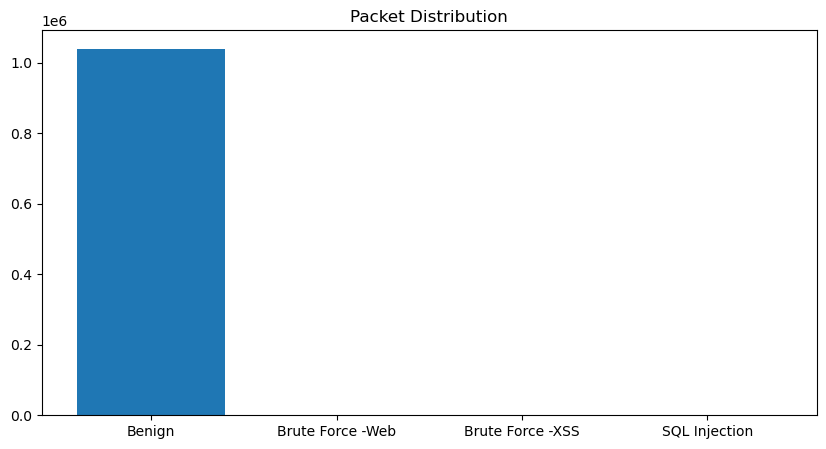

In [33]:
#bar graph for label column
plt.figure(figsize=(10, 5))
plt.title('Packet Distribution')
plt.bar(x=fri['Label'].unique(), height=fri['Label'].value_counts())
p = plt.gcf()

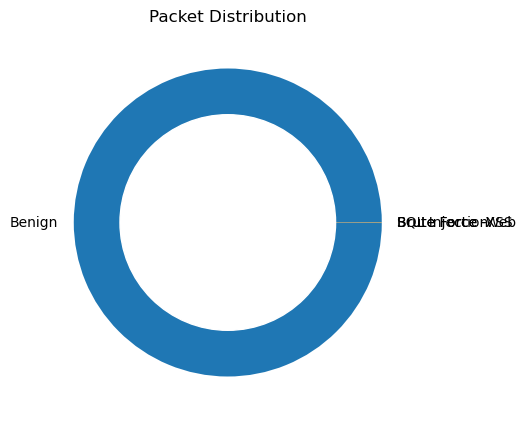

In [34]:
plt.figure(figsize=(5, 5))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.title('Packet Distribution')
plt.pie(fri['Label'].value_counts(), labels=fri['Label'].unique())
p = plt.gcf()
p.gca().add_artist(circle)

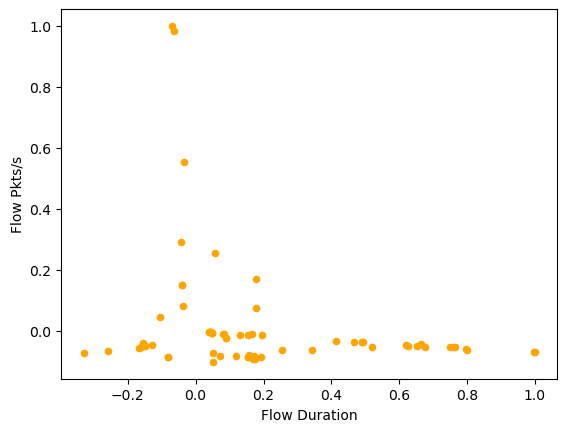

In [36]:
#Scatter Plot
ax1 = df.plot.scatter(x='Flow Duration',y='Flow Pkts/s',c='Orange')

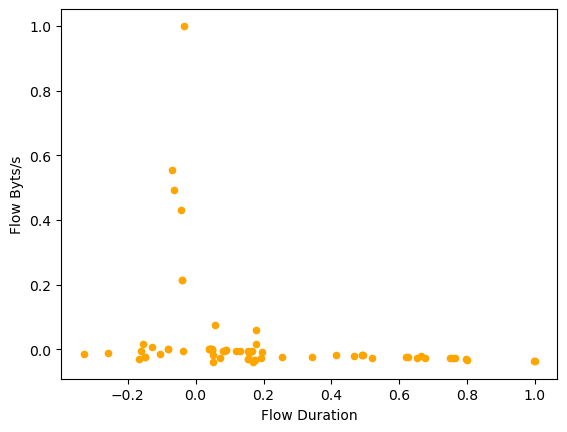

In [37]:
#Scatter Plot
ax1 = df.plot.scatter(x='Flow Duration',y='Flow Byts/s',c='Orange')

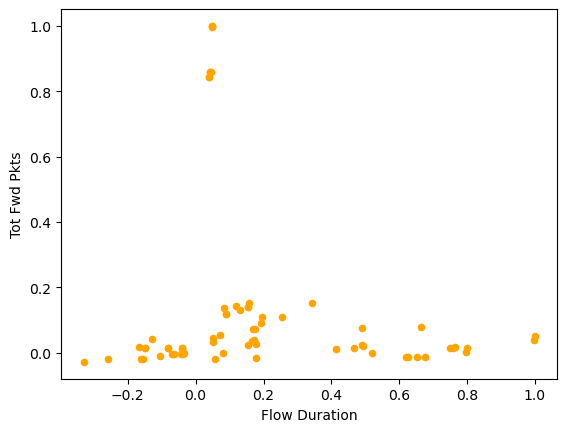

In [38]:
#Scatter Plot
ax1 = df.plot.scatter(x='Flow Duration',y='Tot Fwd Pkts',c='Orange')

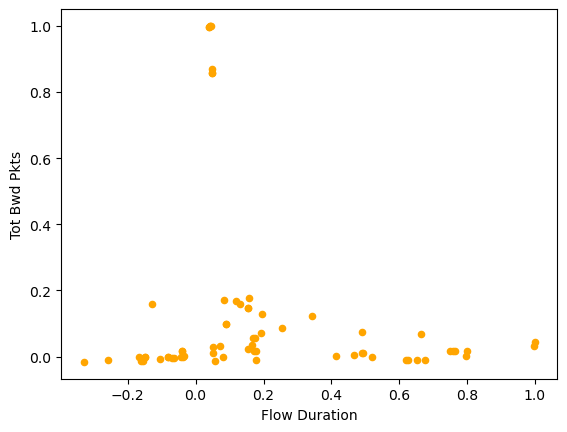

In [39]:
#Scatter Plot
ax1 = df.plot.scatter(x='Flow Duration',y='Tot Bwd Pkts',c='Orange')